# About Data
 - RI: refractive index
 - Na: Sodium (unit measurement: weight percent in the corresponding oxide, as
 - are attributes 4-10)
 - Mg: Magnesium
 - Al: Aluminum
 - Si: Silicon
 - K: Potassium
 - Ca: Calcium
 - Ba: Barium
 - Fe: Iron
     - Type of glass: (class attribute)
     - 1 building_windows_float_processed
     - 2 building_windows_non_float_processed
     - 3 vehicle_windows_float_processed
     - 4 vehicle_windows_non_float_processed (none in this database)
     - 5 containers
     - 6 tableware
     - 7 headlamps

1. [DataPreparation](#1) <a id=100></a>
2. [Exploratory Data Analysis](#2)
3. [Feature Engineering](#3)
4. [Modeling: BalancedBaggingClassifier](#4)
    - 4.1 [Model Evaluation](#5)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### 1. Data Preparation <a id=1></a>
[back to top](#100)

In [2]:
df = pd.read_excel("C:\\Users\\hp\\Desktop\\assignments\\Random Forest\\glass.xlsx")

### 2. Exploratory Data Analysis <a id=2></a>

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There is 214 data, 1 int Dtype, 8 float64 Dtype

<Axes: xlabel='Type', ylabel='count'>

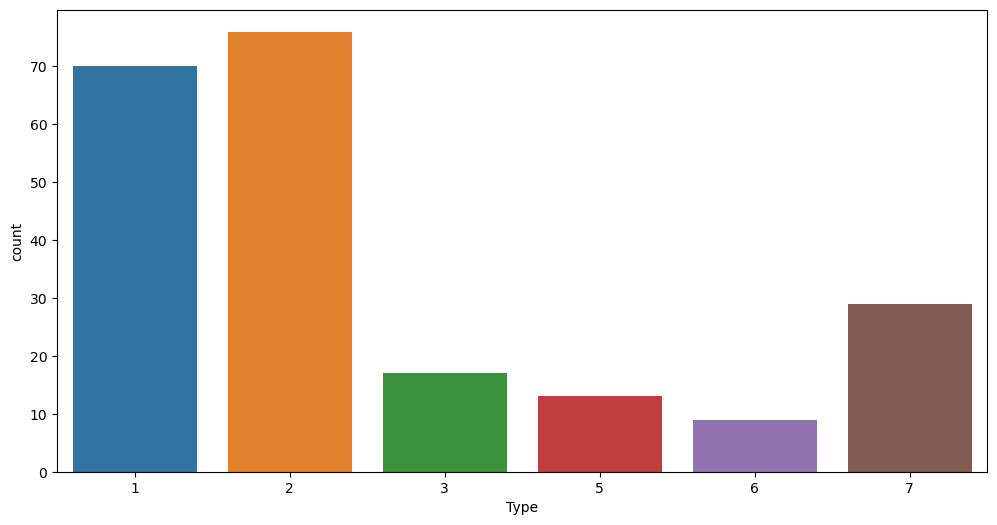

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='Type', data=df)

there is imbalance data

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


there is outlayer in feature K, Ca, BA, and FE

In [7]:
df.describe().T.style.background_gradient(cmap = 'plasma')

,count,mean,std,min,25%,50%,75%,max
RI,214.000000,1.518365,0.003037,1.511150,1.516522,1.517680,1.519157,1.533930
Na,214.000000,13.407850,0.816604,10.730000,12.907500,13.300000,13.825000,17.380000
Mg,214.000000,2.684533,1.442408,0.000000,2.115000,3.480000,3.600000,4.490000
Al,214.000000,1.444907,0.499270,0.290000,1.190000,1.360000,1.630000,3.500000
Si,214.000000,72.650935,0.774546,69.810000,72.280000,72.790000,73.087500,75.410000
K,214.000000,0.497056,0.652192,0.000000,0.122500,0.555000,0.610000,6.210000
Ca,214.000000,8.956963,1.423153,5.430000,8.240000,8.600000,9.172500,16.190000
Ba,214.000000,0.175047,0.497219,0.000000,0.000000,0.000000,0.000000,3.150000
Fe,214.000000,0.057009,0.097439,0.000000,0.000000,0.000000,0.100000,0.510000
Type,214.000000,2.780374,2.103739,1.000000,1.000000,2.000000,3.000000,7.000000


In [8]:
df.corr().style.background_gradient(cmap = 'plasma')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


no feature with high correlation with feature target (Type of glass) so we use non linear model

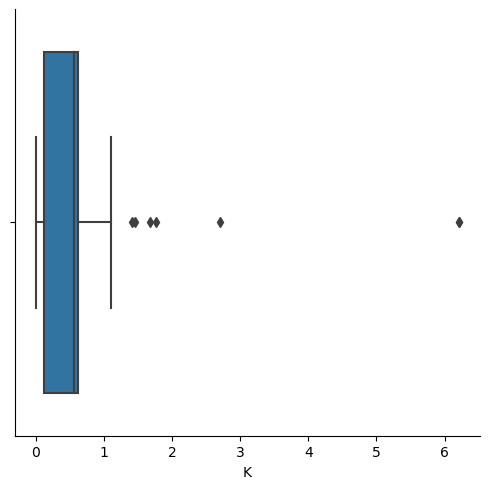

In [9]:
sns.catplot(x='K', kind='box', data=df)

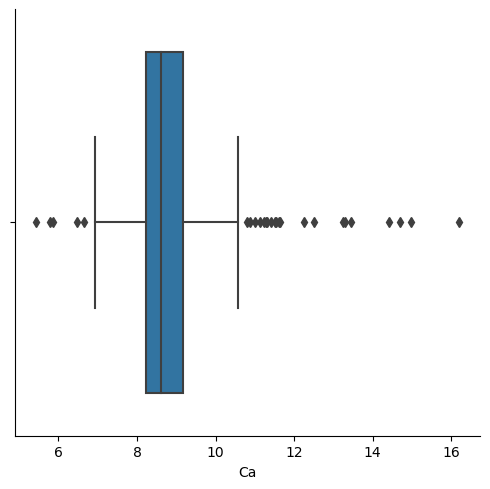

In [10]:
sns.catplot(x='Ca', kind='box', data=df)

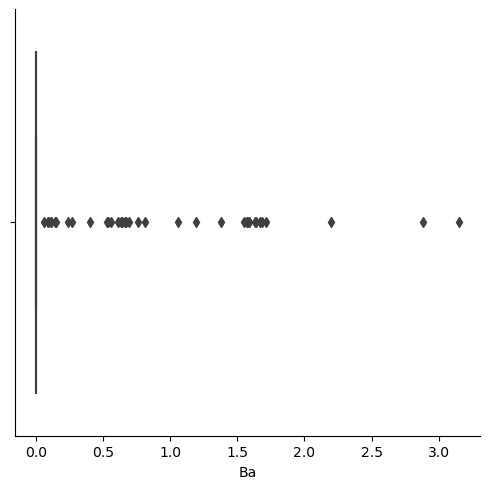

In [11]:
sns.catplot(x='Ba', kind='box', data=df)

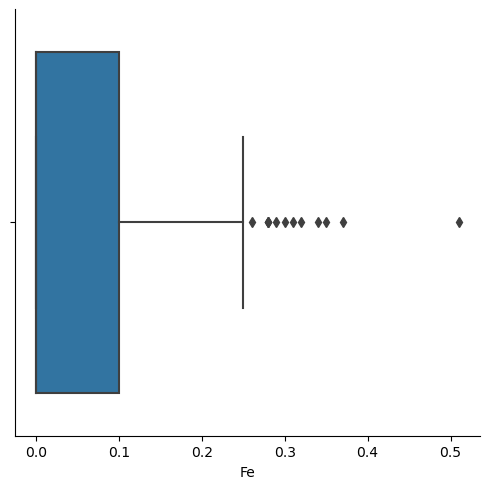

In [12]:
sns.catplot(x='Fe', kind='box', data=df)

### 3. Preprocessing <a id=3></a>
[back to top](#100)

In [13]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Removing Target Variable By Using `pop()`

In [14]:
dfy = df.pop('Type')

#### Encoding The Data By Using `LabelEncoder`:

In [15]:
lblency = LabelEncoder()
lblency.fit(dfy)
dfylbl = lblency.transform(dfy)
dfylbl = pd.DataFrame(dfylbl, columns=['type'])

Observing If Any Data improper

In [16]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [17]:
dfylbl.describe()

,type
count,214.000000
mean,1.542056
std,1.707648
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


Handling imbalance data using SMOTE based techniques

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

Working Procedure: At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below: 
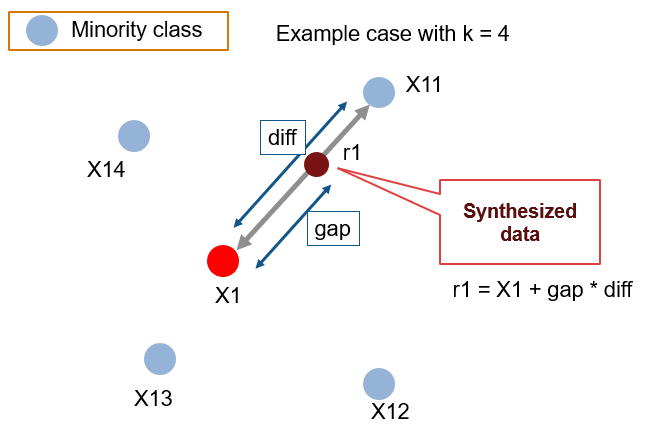

Though this algorithm is quite useful, it has few drawbacks associated with it.

i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

ii) SMOTE tends to create a large no. of noisy data points in feature space

In [18]:
smt = SMOTE(random_state=42, 
                   sampling_strategy={0:400, 1:400, 2:400, 3:400, 4:400, 5:400})
df_smote, dfy_smote = smt.fit_resample(df, dfylbl)

In [19]:
dfy_smote['type'].value_counts()

0    400
1    400
2    400
3    400
4    400
5    400
Name: type, dtype: int64

Let's Dividing The Data Train And Test Split

In [20]:
xtrain, xval, ytrain, yval = train_test_split(df_smote, dfy_smote, test_size=0.2, shuffle=True, 
                                              random_state=42)

Let's Apply feature scaling techniques such as standardization to ensure that all features are on a similar scale
 - Handling the imbalance data.


In [21]:
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xvalsc = sc.transform(xval)

### 4. Modeling: Random Forest <a id=4></a>
[back to top](#100)

In [22]:
rf = RandomForestClassifier()
rf.fit(xtrainsc, ytrain)

RandomForestClassifier()

In [23]:
ypred = rf.predict(xvalsc)

In [24]:
print(classification_report(yval, ypred))
accuracy = accuracy_score(yval, ypred)
print(f"Random Forest Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.99      0.96      0.97        76
           2       0.99      1.00      0.99        79
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        85
           5       0.99      1.00      0.99        81

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

Random Forest Accuracy: 0.9895833333333334


<Axes: >

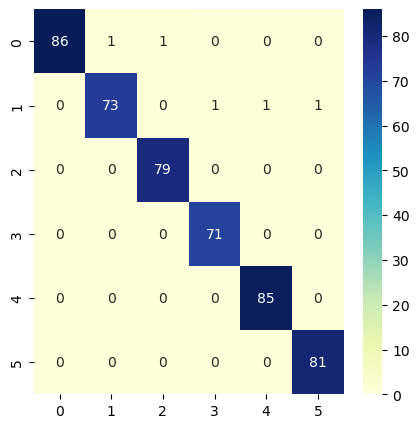

In [25]:
cm = confusion_matrix(yval, ypred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap="YlGnBu")

Text(0.5, 1.0, 'Features Importance')

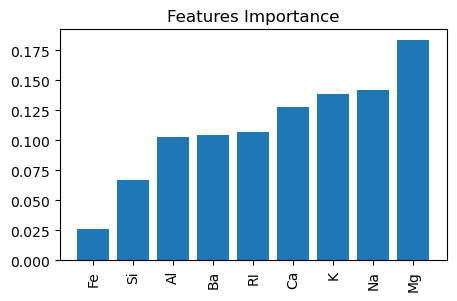

In [26]:
sorted_idx = rf.feature_importances_.argsort()
rf.feature_importances_[sorted_idx]

plt.figure(figsize=(5,3))
plt.xticks(rotation = 90)
plt.bar(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title('Features Importance')

#### 4.1 Model Evaluation <a id=5></a>

In [27]:
joblib.dump(rf, 'model_rf.joblib')

['model_rf.joblib']

In [28]:
model2 = joblib.load('model_rf.joblib')
ypred2 = model2.predict(xvalsc)
print(classification_report(yval, ypred2))
accuracy = accuracy_score(yval, ypred2)
print(f"Random Forest Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.99      0.96      0.97        76
           2       0.99      1.00      0.99        79
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        85
           5       0.99      1.00      0.99        81

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

Random Forest Accuracy: 0.9895833333333334


[back to top](#100)

### Estimators:

#### Start with a Baseline:

Begin with a commonly used default value, such as 100 estimators. This gives you a reference point for performance and training time.
#### Model Complexity and Overfitting:

More estimators can lead to better performance, but after a certain point, the improvements may become negligible or even lead to overfitting, especially in boosting methods.
Monitor the model's performance on both the training and validation sets to detect overfitting.
#### Training Time and Resources:

More estimators require more computation. Balance the number of estimators with your available computational resources and the time you can afford for training.
#### Validation Performance:

Use cross-validation or a validation set to evaluate how performance changes with different numbers of estimators.
Techniques for Deciding the Number of Estimators
#### Grid Search:
Perform a grid search over a range of n_estimators values to find the optimal number. This can be done using libraries like scikit-learn.

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200, 300, 400, 500]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(xtrainsc, ytrain)
print("Best number of estimators for Random Forest:", grid_search_rf.best_params_)

# Example for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200, 300, 400, 500]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5)
grid_search_gb.fit(xtrainsc, ytrain)
print("Best number of estimators for Gradient Boosting:", grid_search_gb.best_params_)

# Example for AdaBoost
param_grid_ada = {'n_estimators': [50, 100, 200, 300, 400, 500]}
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5)
grid_search_ada.fit(xtrainsc, ytrain)
print("Best number of estimators for AdaBoost:", grid_search_ada.best_params_)


Best number of estimators for Random Forest: {'n_estimators': 200}
Best number of estimators for Gradient Boosting: {'n_estimators': 400}
Best number of estimators for AdaBoost: {'n_estimators': 50}


[back to top](#100)

### Bagging (Bootstrap Aggregating)Concept:



Bagging involves creating multiple subsets of data from the original dataset using random sampling with replacement (bootstrap sampling).
Each subset is used to train a separate model (usually the same type of model).
The predictions of these individual models are then combined (aggregated) to form the final prediction. For regression, the average of the predictions is taken, while for classification, a majority vote is taken.
Advantages:

Reduces variance: Since it averages multiple models, it can significantly reduce overfitting.
Improves stability: Models trained on different subsets of data can capture different aspects of the data.
Popular Algorithm:

Random Forest: An extension of bagging applied to decision trees where additional randomness is introduced by selecting a random subset of features for splitting at each node.

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create and train the model
rf_model3 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model3.fit(xtrainsc, ytrain)

# Make predictions
y_pred3 = rf_model3.predict(xvalsc)

# Evaluate the model
accuracy = accuracy_score(yval, y_pred3)
print(f"Random Forest Accuracy: {accuracy}")
print(classification_report(yval, y_pred3))

Random Forest Accuracy: 0.9958333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       1.00      0.99      0.99        76
           2       0.99      1.00      0.99        79
           3       1.00      1.00      1.00        71
           4       0.99      1.00      0.99        85
           5       1.00      1.00      1.00        81

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



[back to top](#100)

### Boosting Concept:

Boosting
Concept:

Boosting involves training multiple models sequentially, where each model attempts to correct the errors of the previous model.
The models are not independent; each new model is influenced by the performance of the previous ones.
The final prediction is a weighted combination of the predictions from all the models.
Advantages:

Reduces both bias and variance: By focusing on errors and iteratively improving them, boosting can create highly accurate models.
Can handle a wide variety of weak learners: Boosting works well even if the individual models are only slightly better than random guessing.
Popular Algorithms:

AdaBoost (Adaptive Boosting): Adjusts the weights of incorrectly classified instances so that subsequent models focus more on them.
Gradient Boosting: Builds models sequentially, where each new model tries to correct the residual errors made by the previous model.
XGBoost: An optimized version of gradient boosting that includes regularization to prevent overfitting and handles missing values.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the model
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(xtrainsc, ytrain)

# Make predictions
y_pred_gb = gb_model.predict(xvalsc)

# Evaluate the model
accuracy_gb = accuracy_score(yval, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(classification_report(yval, y_pred_gb))

Gradient Boosting Accuracy: 0.9895833333333334
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.99      0.97      0.98        76
           2       0.99      0.99      0.99        79
           3       1.00      1.00      1.00        71
           4       0.99      1.00      0.99        85
           5       0.99      1.00      0.99        81

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



[back to top](#100)